In [1]:
 !pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.6 MB/s eta 0:00:00


In [6]:
# --- CF Diagnosis Flu ---
print("\n=== CF Diagnosis Flu ===")
gejala_user = {
    "demam": 0.7,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6
}

pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu: {cf_flu:.2f}")

# Coba ubah nilai "demam" jadi 0.2
print("\n=== Uji perubahan nilai demam ke 0.2 ===")
gejala_user["demam"] = 0.2
cf_flu_updated = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu setelah demam jadi 0.2: {cf_flu_updated:.2f}")
print("Penurunan nilai CF karena kontribusi gejala 'demam' terhadap total keyakinan ikut menurun.")

# Tambahkan 5 gejala baru
print("\n=== Tambah 5 gejala baru ===")
gejala_user = {
    "demam": 0.6,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6,
    "pilek": 0.4,
    "sakit_kepala": 0.5,
    "lemas": 0.3,
    "mual": 0.4,
    "nyeri_otot": 0.6
}

pengetahuan["flu"].update({
    "pilek": 0.5,
    "sakit_kepala": 0.6,
    "lemas": 0.4,
    "mual": 0.3,
    "nyeri_otot": 0.7
})

cf_flu_full = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu setelah tambah gejala: {cf_flu_full:.2f}")



=== CF Diagnosis Flu ===
CF diagnosis Flu: 0.82

=== Uji perubahan nilai demam ke 0.2 ===
CF diagnosis Flu setelah demam jadi 0.2: 0.65
Penurunan nilai CF karena kontribusi gejala 'demam' terhadap total keyakinan ikut menurun.

=== Tambah 5 gejala baru ===
CF diagnosis Flu setelah tambah gejala: 0.95



=== Uji Fuzzy input_suhu 22°C ===
Derajat keanggotaan suhu 22°C:
- Rendah : 0.22
- Nyaman : 0.00
- Panas  : 0.00


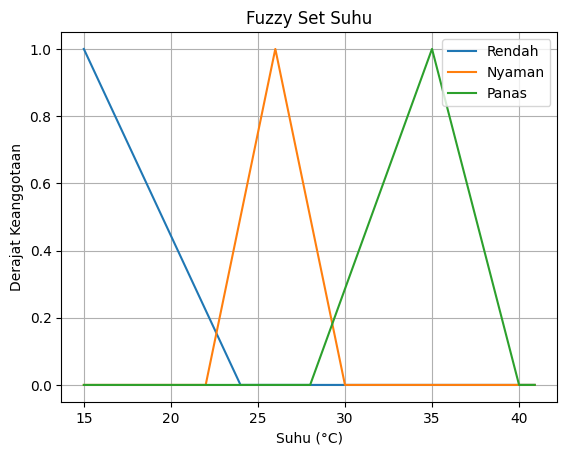


=== Uji keanggotaan suhu 28°C ===
Suhu 28°C memiliki keanggotaan:
- Nyaman : 0.50
- Panas  : 0.00

=== Uji Sistem Fuzzy Suhu 30°C dan Kelembaban 75% ===
Kecepatan kipas: 90.28


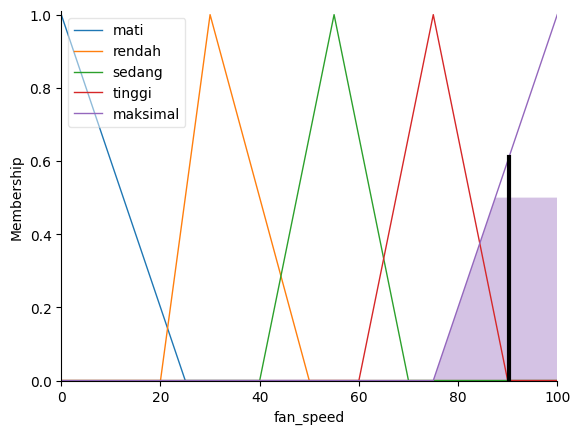

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# --- Fuzzy Input Suhu ---
print("\n=== Uji Fuzzy input_suhu 22°C ===")
suhu = np.arange(15, 41, 0.1)

rendah = fuzz.trimf(suhu, [15, 15, 24])
nyaman = fuzz.trimf(suhu, [22, 26, 30])
panas = fuzz.trimf(suhu, [28, 35, 40])

input_suhu = 22
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_nyaman = fuzz.interp_membership(suhu, nyaman, input_suhu)
suhu_panas = fuzz.interp_membership(suhu, panas, input_suhu)

print(f"Derajat keanggotaan suhu {input_suhu}°C:")
print(f"- Rendah : {suhu_rendah:.2f}")
print(f"- Nyaman : {suhu_nyaman:.2f}")
print(f"- Panas  : {suhu_panas:.2f}")

plt.figure()
plt.plot(suhu, rendah, label="Rendah")
plt.plot(suhu, nyaman, label="Nyaman")
plt.plot(suhu, panas, label="Panas")
plt.title("Fuzzy Set Suhu")
plt.xlabel("Suhu (°C)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.show()

# --- Tambahkan variabel kelembaban dan aturan baru ---
from skfuzzy import control as ctrl

# Input variabel
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variabel
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [40, 55, 70])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [65, 80, 100, 100])

fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [20, 30, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [40, 55, 70])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [60, 75, 90])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Aturan
rules = [
    ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati']),
    ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati']),
    ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah']),
    ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah']),
    ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang']),
    ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi']),
    ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi']),
    ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi']),
    ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])
]

ac_ctrl = ctrl.ControlSystem(rules)
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Uji: Suhu 28°C
print("\n=== Uji keanggotaan suhu 28°C ===")
input_suhu = 28
suhu_nyaman = fuzz.interp_membership(suhu, nyaman, input_suhu)
suhu_panas = fuzz.interp_membership(suhu, panas, input_suhu)
print(f"Suhu 28°C memiliki keanggotaan:")
print(f"- Nyaman : {suhu_nyaman:.2f}")
print(f"- Panas  : {suhu_panas:.2f}")

# Uji sistem fuzzy: suhu 30°C dan kelembaban 75%
print("\n=== Uji Sistem Fuzzy Suhu 30°C dan Kelembaban 75% ===")
ac.input['temperature'] = 30
ac.input['humidity'] = 75
ac.compute()
print(f"Kecepatan kipas: {ac.output['fan_speed']:.2f}")

fan_speed.view(sim=ac)
plt.show()
